In [1]:
import pandas as pd
import datetime
from matplotlib import pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("../data/crimedata_csv_AllNeighbourhoods_AllYears.csv")

In [3]:
moonDtypes = [str, datetime, datetime]
moonData = pd.read_csv("../data/full_moon.csv")

In [4]:
#There's odd whitespace with the headers, so I'll just rename them.
moonData.columns = ['day', 'date', 'time']

In [5]:
moonData['date'] = pd.to_datetime(moonData['date'])
moonData['fullMoon'] = True

In [6]:
moonData = moonData[(moonData.date > pd.Timestamp(2003, 1, 1)) & (moonData.date < pd.Timestamp(2022, 12, 31))]

In [7]:
moonData

,day,date,time,fullMoon
1274,Saturday,2003-01-18,11:47:36 am,True
1275,Monday,2003-02-17,12:51:06 am,True
1276,Tuesday,2003-03-18,11:34:30 am,True
1277,Wednesday,2003-04-16,09:35:42 pm,True
1278,Friday,2003-05-16,05:35:54 am,True
...,...,...,...,...
1516,Friday,2022-08-12,03:35:48 am,True
1517,Saturday,2022-09-10,11:59:06 am,True
1518,Sunday,2022-10-09,10:55:00 pm,True
1519,Tuesday,2022-11-08,12:02:12 pm,True


In [8]:
# data['tempDate'] = data[['YEAR', "MONTH", "DAY", "HOUR", "MINUTE"]].astype(str)

In [9]:
# data['date'] = data.YEAR.astype(str) + data.MONTH.astype(str).apply(lambda x : x.zfill(2)) + \
# data.DAY.astype(str).apply(lambda x : x.zfill(2)) + \
# data.HOUR.astype(str).apply(lambda x : x.zfill(2)) + data.MINUTE.astype(str).apply(lambda x : x.zfill(2))

In [10]:
data

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
0,Break and Enter Commercial,2012,12,14,8,52,NaN,Oakridge,491285.0000,5.453433e+06
1,Break and Enter Commercial,2019,3,7,2,6,10XX SITKA SQ,Fairview,490612.9648,5.457110e+06
2,Break and Enter Commercial,2019,8,27,4,12,10XX ALBERNI ST,West End,491007.7798,5.459174e+06
3,Break and Enter Commercial,2021,4,26,4,44,10XX ALBERNI ST,West End,491007.7798,5.459174e+06
4,Break and Enter Commercial,2014,8,8,5,13,10XX ALBERNI ST,West End,491015.9434,5.459166e+06
...,...,...,...,...,...,...,...,...,...,...
844403,Vehicle Collision or Pedestrian Struck (with I...,2003,9,1,20,45,YUKON ST / W KING EDWARD AVE,Riley Park,491786.0000,5.455143e+06
844404,Vehicle Collision or Pedestrian Struck (with I...,2005,7,20,18,57,YUKON ST / W KING EDWARD AVE,Riley Park,491786.0000,5.455143e+06
844405,Vehicle Collision or Pedestrian Struck (with I...,2016,6,20,18,11,YUKON ST / W KING EDWARD AVE,Riley Park,491786.0000,5.455143e+06
844406,Vehicle Collision or Pedestrian Struck (with I...,2013,12,3,9,49,YUKON ST / W KING EDWARD AVE,Riley Park,491835.0000,5.455126e+06


In [11]:
data[data.duplicated()].sort_values(by=['YEAR', 'MONTH', 'DAY'])

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
223972,Offence Against a Person,2003,1,1,0,0,OFFSET TO PROTECT PRIVACY,Central Business District,0.0,0.0
225898,Offence Against a Person,2003,1,1,0,0,OFFSET TO PROTECT PRIVACY,Central Business District,0.0,0.0
226025,Offence Against a Person,2003,1,1,0,0,OFFSET TO PROTECT PRIVACY,Central Business District,0.0,0.0
256563,Offence Against a Person,2003,1,1,0,0,OFFSET TO PROTECT PRIVACY,Strathcona,0.0,0.0
262066,Offence Against a Person,2003,1,1,0,0,OFFSET TO PROTECT PRIVACY,Grandview-Woodland,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
226354,Offence Against a Person,2022,11,8,0,0,OFFSET TO PROTECT PRIVACY,West End,0.0,0.0
243705,Offence Against a Person,2022,11,8,0,0,OFFSET TO PROTECT PRIVACY,Central Business District,0.0,0.0
230331,Offence Against a Person,2022,11,9,0,0,OFFSET TO PROTECT PRIVACY,Central Business District,0.0,0.0
231795,Offence Against a Person,2022,11,9,0,0,OFFSET TO PROTECT PRIVACY,Central Business District,0.0,0.0


In [12]:
import shutil
shutil.copyfile("../common/ETL.py", "ETL.py")

'ETL.py'

In [13]:
import ETL

In [14]:
data = ETL.clean_data(data)

In [15]:
data.sort_values(by=['date'])

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,isOffset,date
267520,Offence Against a Person,2003,1,1,0,0,OFFSET TO PROTECT PRIVACY,Riley Park,492204.668778,5.456835e+06,True,2003-01-01 00:00:00
760365,Theft of Bicycle,2003,1,1,0,0,6X KEEFER PL,Central Business District,492231.061700,5.458546e+06,False,2003-01-01 00:00:00
260559,Offence Against a Person,2003,1,1,0,0,OFFSET TO PROTECT PRIVACY,Grandview-Woodland,492204.668778,5.456835e+06,True,2003-01-01 00:00:00
507979,Theft from Vehicle,2003,1,1,0,0,10XX W 26TH AVE,Shaughnessy,490707.246600,5.455045e+06,False,2003-01-01 00:00:00
289350,Offence Against a Person,2003,1,1,0,0,OFFSET TO PROTECT PRIVACY,Mount Pleasant,492204.668778,5.456835e+06,True,2003-01-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
386347,Other Theft,2022,11,9,22,46,35XX GRANDVIEW HWY,Renfrew-Collingwood,498073.381500,5.456161e+06,False,2022-11-09 22:46:00
233312,Offence Against a Person,2022,11,10,0,0,OFFSET TO PROTECT PRIVACY,Central Business District,492204.668778,5.456835e+06,True,2022-11-10 00:00:00
832266,Vehicle Collision or Pedestrian Struck (with I...,2022,11,10,15,39,GRANDVIEW HWY / SKEENA ST,Renfrew-Collingwood,497923.000000,5.456152e+06,False,2022-11-10 15:39:00
833735,Vehicle Collision or Pedestrian Struck (with I...,2022,11,10,16,20,KAMLOOPS ST / PANDORA ST,Hastings-Sunrise,496030.000000,5.458917e+06,False,2022-11-10 16:20:00


In [16]:
fullMoonCrimes = data.merge(moonData[['date', 'fullMoon']], on='date', how='left')

In [17]:
fullMoonCrimes['fullMoon'] = fullMoonCrimes['fullMoon'].fillna(False)
fullMoonCrimes['date'] = pd.to_datetime(fullMoonCrimes['date'].dt.date)
#This date is the date of the Stanley Cup Riots, an exceptional day that isn't useful for analyzing trends.
fullMoonCrimes = fullMoonCrimes[fullMoonCrimes['date'] != datetime.datetime(2011, 6, 15)]

In [18]:
fullMoonCrimes[fullMoonCrimes['date'] == pd.Timestamp(2011, 6, 15)]

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,isOffset,date,fullMoon


In [19]:
totalCrimesByDay = data.copy()
totalCrimesByDay['date'] = totalCrimesByDay['date'].dt.date
totalCrimesByDay = totalCrimesByDay.groupby(['date']).agg(total_crimes=('date', 'count'))
# totalCrimesByDay = totalCrimesByDay.merge(moonData[['date', 'fullMoon']], on='date', how='left')

In [20]:
totalCrimesByDay[totalCrimesByDay['total_crimes'] > 500]

,total_crimes
date,
2011-06-15,714


In [21]:
fullMoonCrimesByDay = fullMoonCrimes[fullMoonCrimes.fullMoon].groupby(['date']).agg(total_crimes=('date', 'count'))#.reset_index()
fullMoonCrimesByDay

,total_crimes
date,
2003-01-18,14
2003-02-17,13
2003-03-18,15
2003-04-16,6
2003-05-16,18
...,...
2022-07-13,17
2022-08-12,12
2022-09-10,24


In [22]:
nonFullMoonCrimesByDay = fullMoonCrimes[~fullMoonCrimes.fullMoon].groupby(['date']).agg(total_crimes=('date', 'count'))#.reset_index()
nonFullMoonCrimesByDay

,total_crimes
date,
2003-01-01,224
2003-01-02,161
2003-01-03,182
2003-01-04,162
2003-01-05,132
...,...
2022-11-07,82
2022-11-08,49
2022-11-09,50


In [23]:
fullMoonCrimes[fullMoonCrimes.fullMoon].sort_values(by=['date'])

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,isOffset,date,fullMoon
219161,Offence Against a Person,2003,1,18,0,0,OFFSET TO PROTECT PRIVACY,West End,492204.668778,5.456835e+06,True,2003-01-18,True
261569,Offence Against a Person,2003,1,18,0,0,OFFSET TO PROTECT PRIVACY,Grandview-Woodland,492204.668778,5.456835e+06,True,2003-01-18,True
230785,Offence Against a Person,2003,1,18,0,0,OFFSET TO PROTECT PRIVACY,Central Business District,492204.668778,5.456835e+06,True,2003-01-18,True
149246,Mischief,2003,1,18,0,0,22XX E 52ND AVE,Victoria-Fraserview,495457.865900,5.452154e+06,False,2003-01-18,True
226607,Offence Against a Person,2003,1,18,0,0,OFFSET TO PROTECT PRIVACY,West End,492204.668778,5.456835e+06,True,2003-01-18,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
243705,Offence Against a Person,2022,11,8,0,0,OFFSET TO PROTECT PRIVACY,Central Business District,492204.668778,5.456835e+06,True,2022-11-08,True
236529,Offence Against a Person,2022,11,8,0,0,OFFSET TO PROTECT PRIVACY,Central Business District,492204.668778,5.456835e+06,True,2022-11-08,True
226354,Offence Against a Person,2022,11,8,0,0,OFFSET TO PROTECT PRIVACY,West End,492204.668778,5.456835e+06,True,2022-11-08,True
289690,Offence Against a Person,2022,11,8,0,0,OFFSET TO PROTECT PRIVACY,Mount Pleasant,492204.668778,5.456835e+06,True,2022-11-08,True


In [24]:
notFullMoon = fullMoonCrimes[~fullMoonCrimes.fullMoon]
notFullMoon

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,isOffset,date,fullMoon
0,Break and Enter Commercial,2012,12,14,8,52,NaN,Oakridge,491285.0000,5.453433e+06,False,2012-12-14,False
1,Break and Enter Commercial,2019,3,7,2,6,10XX SITKA SQ,Fairview,490612.9648,5.457110e+06,False,2019-03-07,False
2,Break and Enter Commercial,2019,8,27,4,12,10XX ALBERNI ST,West End,491007.7798,5.459174e+06,False,2019-08-27,False
3,Break and Enter Commercial,2021,4,26,4,44,10XX ALBERNI ST,West End,491007.7798,5.459174e+06,False,2021-04-26,False
4,Break and Enter Commercial,2014,8,8,5,13,10XX ALBERNI ST,West End,491015.9434,5.459166e+06,False,2014-08-08,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
844403,Vehicle Collision or Pedestrian Struck (with I...,2003,9,1,20,45,YUKON ST / W KING EDWARD AVE,Riley Park,491786.0000,5.455143e+06,False,2003-09-01,False
844404,Vehicle Collision or Pedestrian Struck (with I...,2005,7,20,18,57,YUKON ST / W KING EDWARD AVE,Riley Park,491786.0000,5.455143e+06,False,2005-07-20,False
844405,Vehicle Collision or Pedestrian Struck (with I...,2016,6,20,18,11,YUKON ST / W KING EDWARD AVE,Riley Park,491786.0000,5.455143e+06,False,2016-06-20,False
844406,Vehicle Collision or Pedestrian Struck (with I...,2013,12,3,9,49,YUKON ST / W KING EDWARD AVE,Riley Park,491835.0000,5.455126e+06,False,2013-12-03,False


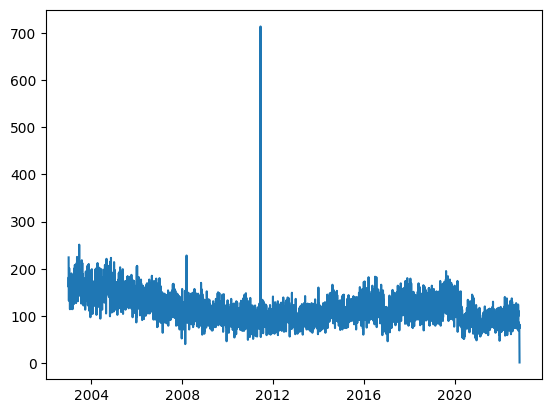

In [25]:
plt.plot(totalCrimesByDay)
plt.show()

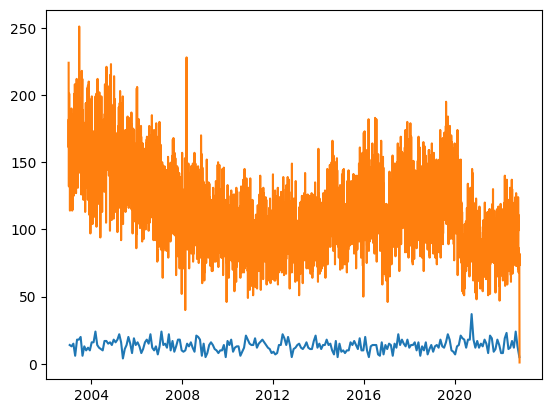

In [26]:
plt.plot(fullMoonCrimesByDay)
plt.plot(nonFullMoonCrimesByDay)